In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, r'C:\Users\Admin\main\Coding\science_code\Superconductive-Memory\solver')

In [2]:
from Objects import Pulses, JTL, R, L, JJ, Ib
from FunctionCompiler import *

In [23]:
# Natural Values
L1_value = 4.2*10**(-12)

Ic_1_value = 0.22*10**(-3)
Ic_2_value = 0.3*10**(-3)
Ic_3_value = Ic_2_value
Ic_4_value = Ic_1_value
Ic_5_value = Ic_2_value
Ic_6_value = Ic_3_value
Ic_7_value = Ic_1_value
Ic_8_value = Ic_2_value
Ic_9_value = Ic_3_value
Ic_10_value = Ic_1_value
Ic_11_value = Ic_2_value
Ic_12_value = Ic_3_value

Ic_array = np.array([Ic_1_value,Ic_2_value,Ic_3_value,Ic_4_value,Ic_5_value,Ic_6_value,Ic_7_value, Ic_8_value, Ic_9_value, Ic_10_value, Ic_11_value, Ic_12_value])
L_array = np.array([L1_value])
Istina = True

In [24]:
# Normirovka
L_norm = 2.64*10**(-12)
I_norm = 0.125*10**(-3)
R_norm = 2.4
C_norm = 455*10**(-15)

In [25]:
# Symc Values
while Istina:
    for i in range(len(Ic_array)):
        try:
            L_array[i] = L_array[i]/L_norm
        except:
            #print("Finish L_array")
            pass
        finally:
            Ic_array[i] = Ic_array[i]/I_norm
    Istina = False

In [31]:
l1 = L.L(loc=[7,15],val=1)
l2 = L.L(loc=[11,16],val=1)
l3 = L.L(loc=[12,17],val=1)
l4 = L.L(loc=[8,18],val=1)

l5 = L.L(loc=[3,13],val=1)
l6 = L.L(loc=[1,5],val=1)
l7 = L.L(loc=[4,14],val=1)
l8 = L.L(loc=[2,6],val=1)

L_1 = L.L(loc=[9,10],val=L_array[0])

j1 = JJ.JJ(loc=[15,0],A=1,c=1)
j2 = JJ.JJ(loc=[16,0],A=1,c=1)
j3 = JJ.JJ(loc=[17,0],A=1,c=1)
j4 = JJ.JJ(loc=[18,0],A=1,c=1)

J_1 = JJ.JJ(loc=[7,0],A=Ic_array[0],c=1)
J_2 = JJ.JJ(loc=[5,7],A=Ic_array[1],c=1)
J_3 = JJ.JJ(loc=[9,7],A=Ic_array[2],c=1)
J_4 = JJ.JJ(loc=[8,0],A=Ic_array[3],c=1)
J_5 = JJ.JJ(loc=[8,6],A=Ic_array[4],c=1)
J_6 = JJ.JJ(loc=[10,8],A=Ic_array[5],c=1)

J_7 = JJ.JJ(loc=[11,0],A=Ic_array[6],c=1)
J_8 = JJ.JJ(loc=[11,13],A=Ic_array[7],c=1)
J_9 = JJ.JJ(loc=[9,11],A=Ic_array[8],c=1)
J_10 = JJ.JJ(loc=[12,0],A=Ic_array[9],c=1)
J_11 = JJ.JJ(loc=[12,14],A=Ic_array[10],c=1)
J_12 = JJ.JJ(loc=[10,12],A=Ic_array[11],c=1)

Ib_1 = Ib.Ib(loc=[9],val=0.46*10**(-3)/I_norm)

S1 = Pulses.Pulses(loc=[1],A=4,t0=30)
R1 = Pulses.Pulses(loc=[2],A=4,t0=70)
S2 = Pulses.Pulses(loc=[3],A=4,t0=100, T=150)

t = np.arange(0, 500, 0.5)
fc = FunctionCompiler([l1, l2, l3, l4, l5, l6, l7, l8, L_1, j1, j2, j3, j4, J_1, J_2, J_3, J_4, J_5, J_6, J_7, J_8, J_9, J_10, J_11, J_12, Ib_1, S1,S2, R1], t)
sol = fc.solve()

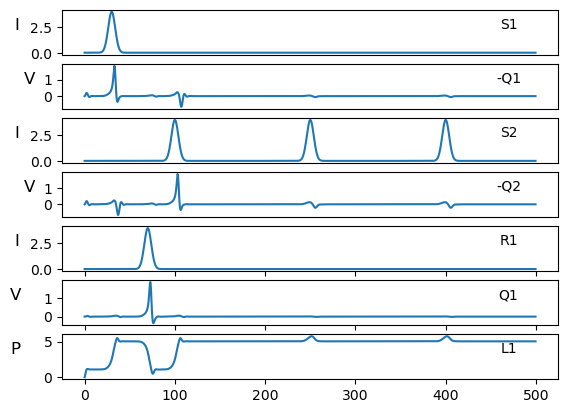

In [32]:
fig, ax = plt.subplots(nrows=7,ncols=1,dpi=100,gridspec_kw={'height_ratios': [40,40,40,40,40,40,40]})

# Input S1
plt.subplot(7,1,1)
plt.ylabel("I",rotation=0,fontsize=12,labelpad=10)
plt.title('S1',x = 0.9,y=0.4, fontsize=10.0)
plt.plot(t,S1.get_data("I",t,sol))
plt.xticks([])

# Output -Q1
plt.subplot(7,1,2)
plt.ylabel("V",rotation=0,fontsize=12,labelpad=10)
plt.title('-Q1',x = 0.9,y=0.4, fontsize=10.0)
plt.xticks([])
plt.plot(t,j1.get_data("V",t,sol))

# Input S2
plt.subplot(7,1,3)
plt.ylabel("I",rotation=0,fontsize=12,labelpad=10)
plt.title('S2',x = 0.9,y=0.4, fontsize=10.0)
plt.xticks([])
plt.plot(t,S2.get_data("I",t,sol))

# Output -Q2
plt.subplot(7,1,4)
plt.ylabel("V",rotation=0,fontsize=12,labelpad=10)
plt.title('-Q2',x = 0.9,y=0.4, fontsize=10.0)
plt.xticks([])
plt.plot(t,j2.get_data("V",t,sol))

# Input R1
plt.subplot(7,1,5)
plt.ylabel("I",rotation=0,fontsize=12,labelpad=10)
plt.title('R1',x = 0.9,y=0.4, fontsize=10.0)
plt.plot(t,R1.get_data("I",t,sol))

# Output Q1
plt.subplot(7,1,6)
plt.ylabel("V",rotation=0,fontsize=12,labelpad=20)
plt.title('Q1',x = 0.9,y=0.4, fontsize=10.0)
plt.plot(t,j4.get_data("V",t,sol))

# L1
plt.subplot(7,1,7)
plt.ylabel("P",rotation=0,fontsize=12,labelpad=20)
plt.title('L1',x = 0.9,y=0.4, fontsize=10.0)
plt.plot(t,L_1.get_data("P",t,sol))

plt.savefig(r"C:\Users\Admin\main\Coding\science_code\Superconductive-Memory\graphics\BFF\S2_periodic.jpg")

# Low Part

In [38]:
l1 = L.L(loc=[7,9],val=1)
l4 = L.L(loc=[8,10],val=1)
l6 = L.L(loc=[1,5],val=1)
l8 = L.L(loc=[2,6],val=1)

L_1 = L.L(loc=[3,4],val=L_array[0])

j1 = JJ.JJ(loc=[9,0],A=1,c=1)
j4 = JJ.JJ(loc=[10,0],A=1,c=1)

J_1 = JJ.JJ(loc=[7,0],A=Ic_array[0],c=1)
J_2 = JJ.JJ(loc=[5,7],A=Ic_array[1],c=1)
J_3 = JJ.JJ(loc=[3,7],A=Ic_array[2],c=1)
J_4 = JJ.JJ(loc=[8,0],A=Ic_array[3],c=1)
J_5 = JJ.JJ(loc=[8,6],A=Ic_array[4],c=1)
J_6 = JJ.JJ(loc=[4,8],A=Ic_array[5],c=1)

Ib_1 = Ib.Ib(loc=[3],val=0.46*10**(-3)/1.5*1/I_norm)

S1 = Pulses.Pulses(loc=[1],A=2,t0=30)
R1 = Pulses.Pulses(loc=[2],A=2,t0=70, T=100)

t = np.arange(0, 500, 0.5)
fc = FunctionCompiler([l1, l4, l6, l8, L_1, j1, j4, J_1, J_2, J_3, J_4, J_5, J_6, Ib_1, S1, R1], t)
sol = fc.solve()

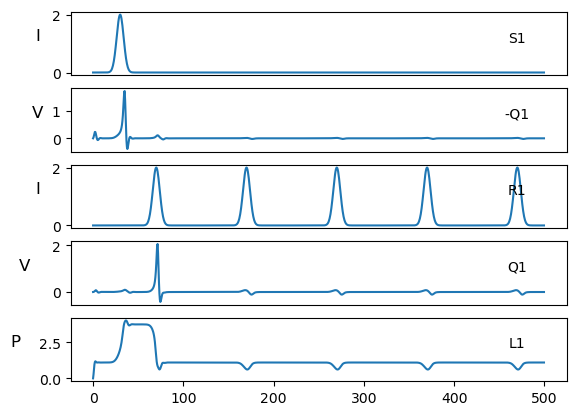

In [39]:
fig, ax = plt.subplots(nrows=5,ncols=1,dpi=100,gridspec_kw={'height_ratios': [40,40,40,40,40]})

# Input S1
plt.subplot(5,1,1)
plt.ylabel("I",rotation=0,fontsize=12,labelpad=10)
plt.title('S1',x = 0.9,y=0.4, fontsize=10.0)
plt.plot(t,S1.get_data("I",t,sol))
plt.xticks([])

# Output -Q1
plt.subplot(5,1,2)
plt.ylabel("V",rotation=0,fontsize=12,labelpad=10)
plt.title('-Q1',x = 0.9,y=0.4, fontsize=10.0)
plt.xticks([])
plt.plot(t,j1.get_data("V",t,sol))

# Input R1
plt.subplot(5,1,3)
plt.ylabel("I",rotation=0,fontsize=12,labelpad=10)
plt.xticks([])
plt.title('R1',x = 0.9,y=0.4, fontsize=10.0)
plt.plot(t,R1.get_data("I",t,sol))

# Output Q1
plt.subplot(5,1,4)
plt.ylabel("V",rotation=0,fontsize=12,labelpad=20)
plt.xticks([])
plt.title('Q1',x = 0.9,y=0.4, fontsize=10.0)
plt.plot(t,j4.get_data("V",t,sol))

# L1
plt.subplot(5,1,5)
plt.ylabel("P",rotation=0,fontsize=12,labelpad=17)
plt.title('L1',x = 0.9,y=0.4, fontsize=10.0)
plt.plot(t,L_1.get_data("P",t,sol))

plt.savefig(r"C:\Users\Admin\main\Coding\science_code\Superconductive-Memory\graphics\BFF\2.0_R1_periodic.jpg")